### Goal:
Using the data available in file concrete_data.xls, apply feature engineering methods to obtain 85% to 95% accuracy. 

In [1]:
#importing all the package required for initial analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler


concrete_df = pd.read_csv("concrete.csv")
print(concrete_df.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  


In [2]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [3]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


** The features that have been considered to have influence on the strength of the concrete:**

1 CEMENT

2 SLAG - Hydraulic cement formed when granulated blast furnace slag (GGBFS) is ground to suitable fineness and is used to replace a portion of portland cement. 

3 ASH - A material used to improve strength and durability of hardened concrete.

4 WATER

5 SUPERPLASTIC - ADMIXTURE which improves the strength and durability of concrete

6 COARSE AGGREGATES

7 FINE AGGREGATES

8 AGE

The 9th column in the dataframe is 'STRENGTH' which is the target variable which we will predict.

The aim is to develop a model which can predict the strength of the concrete based on these features with more than 95% accuracy.

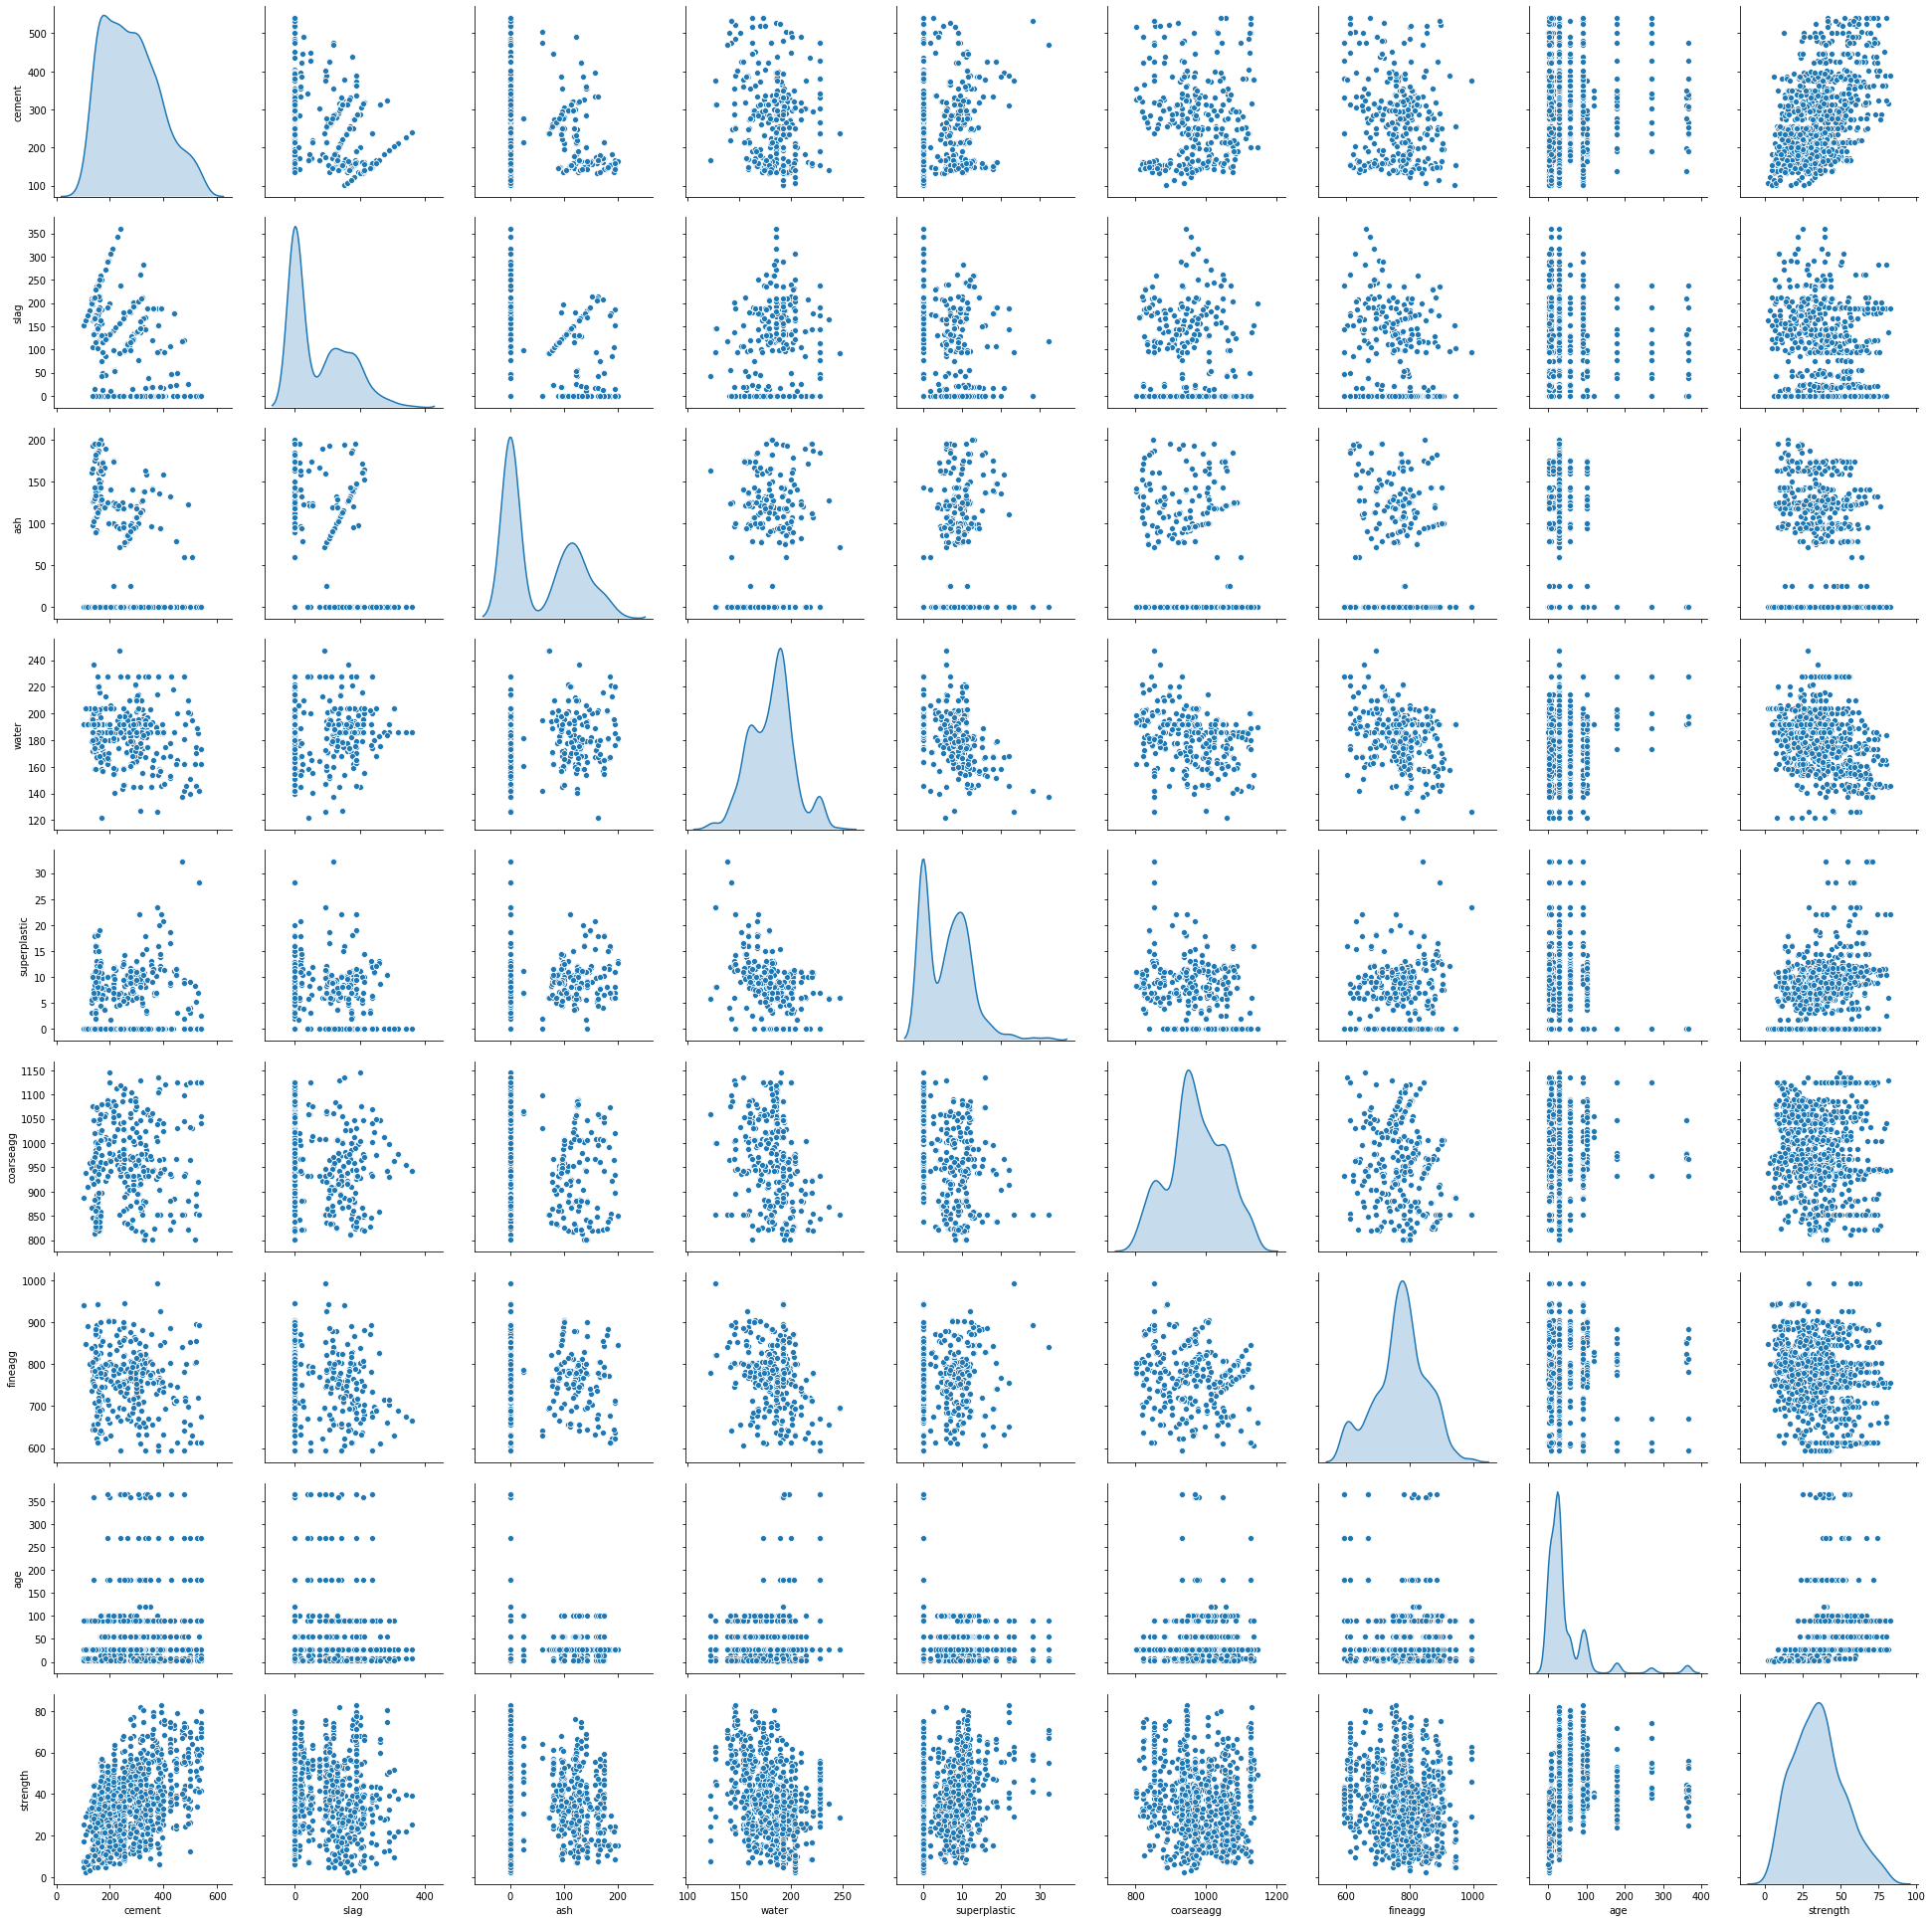

In [4]:
sns.pairplot(concrete_df,height=3, diag_kind="kde")

From the description of the data above, observation of the first column `count` tells us that there is no missing data. From the range of data across columns, it is evident that scaling the values will facilitate analysis of the data. From the pairplot above, the diagonal is indicative of the the fact that the data might be from different Gaussians, as you see more than one peak. This shows there might be outliers. Let's now plot the data to see if there are any outliers and if any outlier treatment is necessary.

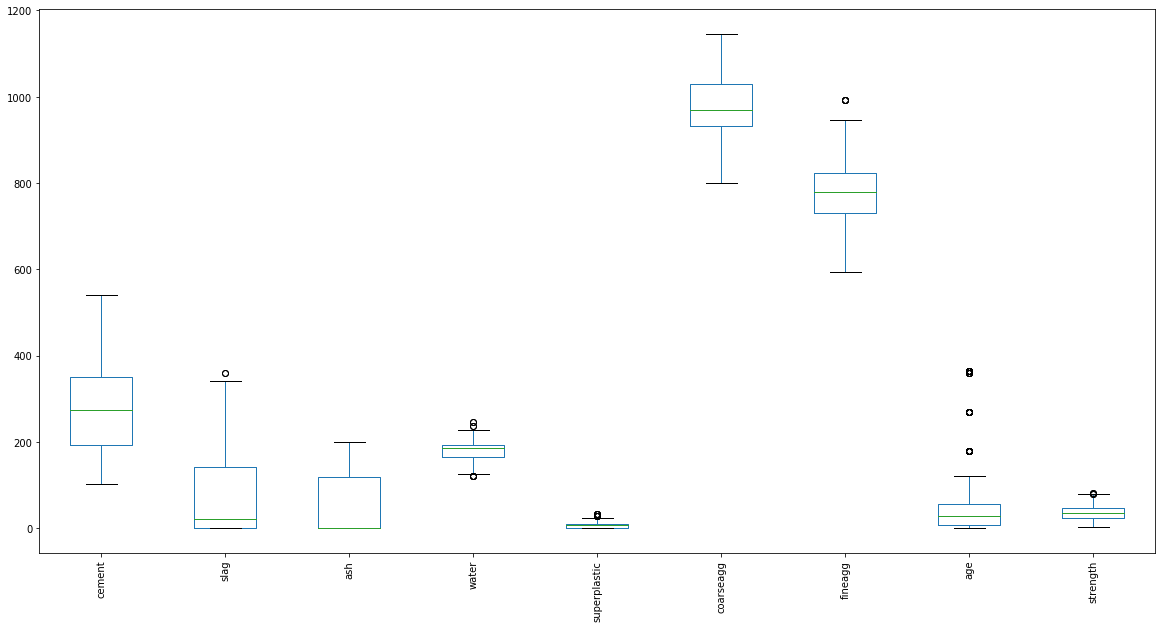

In [5]:
#Box plot the dataframe to find outliers
concrete_df.plot(kind='box', figsize=(20,10),legend=True, rot=90)


### Outlier treatment
After scaling and plotting the values, we can see that there are many outliers. We will use capping to treat the outliers.

Outliers in Column  slag
[919, 991]
Outliers in Column  water
[67, 264, 433, 463, 588, 741, 790, 827, 915]
Outliers in Column  superplastic
[45, 157, 233, 293, 539, 745, 817, 839, 956, 1027]
Outliers in Column  fineagg
[130, 448, 505, 585, 858]
Outliers in Column  age
[52, 65, 94, 100, 104, 134, 145, 150, 153, 158, 160, 199, 200, 208, 257, 263, 271, 298, 303, 313, 314, 324, 360, 362, 371, 394, 449, 466, 485, 540, 571, 582, 595, 602, 621, 623, 624, 633, 643, 697, 714, 721, 722, 755, 756, 777, 851, 862, 879, 901, 902, 920, 952, 958, 972, 986, 996, 1018, 1029]
Outliers in Column  strength
[193, 733, 951, 1004]


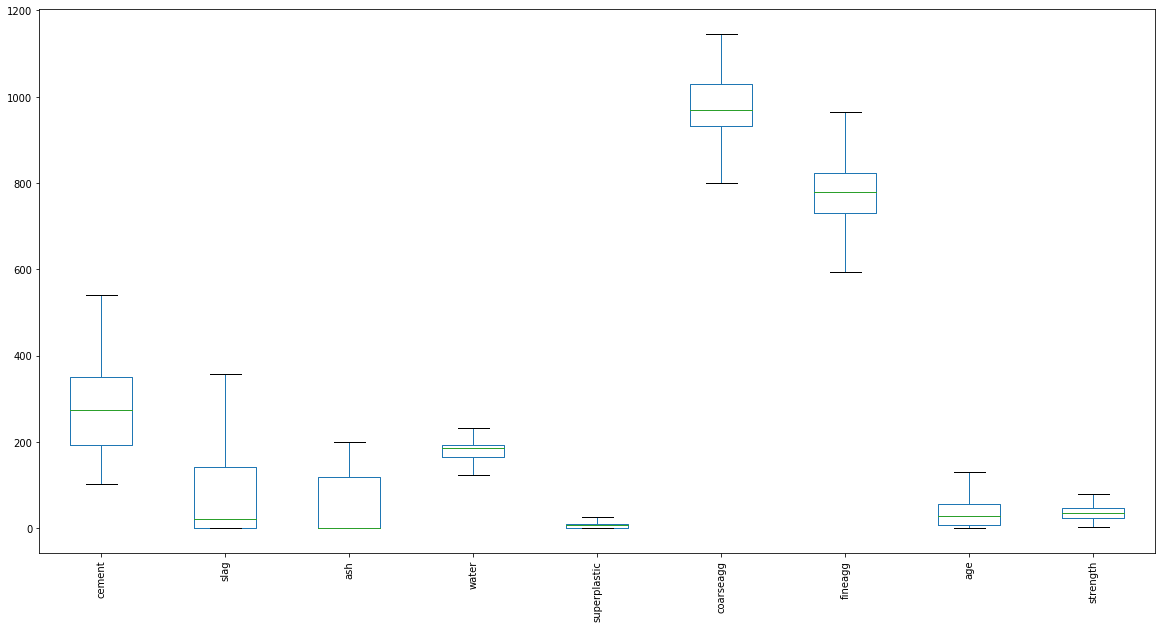

In [6]:
for col in concrete_df.columns:
    q1, col_median, q3= np.percentile(concrete_df[col],[25,50,75])
    iqr = q3-q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    outliers=[]
    row = 0
    for val in concrete_df[col]:
        row = row + 1
        if val < lower_bound or val>upper_bound:
            outliers.append(row)

    if(len(outliers)>0):
        print("Outliers in Column ",col)
        print(outliers)
    concrete_df.loc[(concrete_df[col] > upper_bound),col] = upper_bound
    concrete_df.loc[(concrete_df[col] < lower_bound),col] = lower_bound
    


#Box plot the dataframe after outlier treatment.
concrete_df.plot(kind='box', figsize=(20,10),legend=True, rot=90)
    

In [7]:

scaler = MinMaxScaler()
scaler.fit(concrete_df)
MinMaxScaler(copy=True, feature_range=(0, 1))

transformedArr = scaler.transform(concrete_df)

transform_df = pd.DataFrame(transformedArr)
transform_df.columns = concrete_df.columns

transform_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,0.409059,0.238599,0.0,0.206336,0.390183,0.566210,1.0
slag,1030.0,0.206763,0.241389,0.0,0.000000,0.061560,0.400000,1.0
ash,1030.0,0.270806,0.319825,0.0,0.000000,0.000000,0.591204,1.0
water,1030.0,0.528536,0.195803,0.0,0.375000,0.560424,0.625000,1.0
superplastic,1030.0,0.241531,0.227547,0.0,0.000000,0.250980,0.400000,1.0
coarseagg,1030.0,0.499764,0.226029,0.0,0.380814,0.485465,0.663953,1.0
fineagg,1030.0,0.485530,0.215965,0.0,0.370561,0.501928,0.622336,1.0
age,1030.0,0.288486,0.278461,0.0,0.046693,0.210117,0.428016,1.0
strength,1030.0,0.432355,0.215533,0.0,0.276076,0.414695,0.565645,1.0


Let's heat map the correlation between the features.

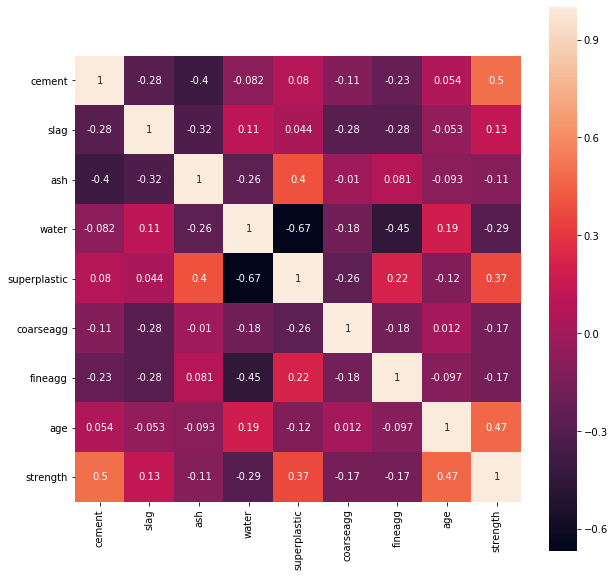

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(transform_df.corr(), square=True, annot=True, )


The cement and the age seem to have the most correlation with the strength. All the other features don't have much of a correlation. Let's first develop a model without any feature selection, considering all the features and then use some scikit modules to evaluate the features and select them and evaluate the models again based on the specific features.

### Importing all the required regressors

Since the target variable here is continuous, we will use the regression models for prediction. 

We will use multiple regression models and fit the sample into the each of the model, split it into test and training data and check the accuracy of the prediction to find out the optimum model.

In [9]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor


regArr = [GradientBoostingRegressor(n_estimators=50),
          BaggingRegressor(n_estimators=100, oob_score= True),
         RandomForestRegressor(n_estimators=100),
         DecisionTreeRegressor(max_depth=10,presort=True),
         LinearRegression(),
         GaussianProcessRegressor(random_state=5)]


In [10]:
def predictModelAccuracy(model,X,y):
    model.fit(X,y)
    X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=5)
    test_prediction = model.predict(X_test)
    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    return test_score,train_score

Now that we have done outlier treatment and scaled the data, we will first determine the prediction accuracy for test and training data based on various regression models to see which is the best fit, without any feature reduction.

In [11]:
strength = transform_df['strength']
transform_df_features = transform_df.copy()
transform_df_features.drop(labels='strength', axis = 1, inplace=True)

X = np.array(transform_df_features)
y = np.array(strength)


for model in regArr:
    test_score, train_score = predictModelAccuracy(model,X,y)
    print("**%s** Test Data Score:  %.4f Training Data Score: %.4f" %(model.__class__.__name__, test_score, train_score))
    


**GradientBoostingRegressor** Test Data Score:  0.9049 Training Data Score: 0.9124
**BaggingRegressor** Test Data Score:  0.9884 Training Data Score: 0.9854
**RandomForestRegressor** Test Data Score:  0.9878 Training Data Score: 0.9849
**DecisionTreeRegressor** Test Data Score:  0.9747 Training Data Score: 0.9732
**LinearRegression** Test Data Score:  0.7240 Training Data Score: 0.7310
**GaussianProcessRegressor** Test Data Score:  0.9959 Training Data Score: 0.9940


In [12]:
#using meta-estimator VotingRegressor to find the average of all predictions which will be a best-fit in production

voteReg = VotingRegressor(estimators=[('gb', regArr[0]), ('br', regArr[1]), ('rf', regArr[2]),
                                      ('dtr', regArr[3]), ('lr', regArr[4]), ('gpr',regArr[5])])
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)
voteReg.fit(X, y)

test_prediction = voteReg.predict(X_test)
test_score = voteReg.score(X_test, y_test)
train_score = voteReg.score(X_train, y_train)
print("**VotingRegressor** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))



**VotingRegressor** Test Data Score:  0.9738 Training Data Score: 0.9706


Now we will use feature reduction and optimize the features which influence the target value, using SelectKBest and SelectFromModel and then observe the performance prediction model based on various regressors.

### SelectKBest features - K ranging from 2 to 8

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

for i in range(2,9):
    X_new = SelectKBest(f_regression, k=i).fit_transform(X,y)
    print("Prediction accuracy with ",i," best features")
    print("====================================================================")

    for model in regArr:
        test_score, train_score = predictModelAccuracy(model,X_new,y)
        print("**%s** Test Data Score:  %.4f Training Data Score: %.4f" %(model.__class__.__name__, test_score, train_score))

    print("\n====================================================================\n")
    voteReg.fit(X_new,y)
    X_train, X_test,y_train,y_test = train_test_split(X_new,y, test_size = 0.30, random_state=1)
    test_prediction = voteReg.predict(X_test)
    test_score = voteReg.score(X_test, y_test)
    train_score = voteReg.score(X_train, y_train)
    print("**VotingRegressor** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))
    print("\n====================================================================\n")


Prediction accuracy with  2  best features
**GradientBoostingRegressor** Test Data Score:  0.7206 Training Data Score: 0.7494
**BaggingRegressor** Test Data Score:  0.9196 Training Data Score: 0.9186
**RandomForestRegressor** Test Data Score:  0.9176 Training Data Score: 0.9171
**DecisionTreeRegressor** Test Data Score:  0.8759 Training Data Score: 0.8794
**LinearRegression** Test Data Score:  0.4646 Training Data Score: 0.4365
**GaussianProcessRegressor** Test Data Score:  0.6540 Training Data Score: 0.6563


**VotingRegressor** Test Data Score:  0.8231 Training Data Score: 0.8436


Prediction accuracy with  3  best features
**GradientBoostingRegressor** Test Data Score:  0.8007 Training Data Score: 0.8277
**BaggingRegressor** Test Data Score:  0.9669 Training Data Score: 0.9634
**RandomForestRegressor** Test Data Score:  0.9655 Training Data Score: 0.9642
**DecisionTreeRegressor** Test Data Score:  0.9230 Training Data Score: 0.9454
**LinearRegression** Test Data Score:  0.5793 Train

The SelectKBest has very good performance on the test data and training data when considering 5 or more features. 

#### The prediction score based on 5 features where accuracy more than 95%
**BaggingRegressor** Test Data Score:  0.9837 Training Data Score: 0.9810

**RandomForestRegressor** Test Data Score:  0.9829 Training Data Score: 0.9824

**DecisionTreeRegressor** Test Data Score:  0.9519 Training Data Score: 0.9583

**GaussianProcessRegressor** Test Data Score:  0.9612 Training Data Score: 0.9689

====================================================================

**VotingRegressor** Test Data Score:  0.9533 Training Data Score: 0.9518

### SelectFromModel using LassoCV

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)

X_new = SelectFromModel(lassocv, threshold=0.25).fit_transform(X, y)
print("Original data \n",transform_df_features.head(2))
print("\nSelective data\n",X_new[0:2])

for model in regArr:
    test_score, train_score = predictModelAccuracy(model,X_new,y)
    print("**%s** Test Data Score:  %.4f Training Data Score: %.4f" %(model.__class__.__name__, test_score, train_score))

print("\n====================================================================\n")
voteReg.fit(X_new,y)
X_train, X_test,y_train,y_test = train_test_split(X_new,y, test_size = 0.30, random_state=1)
test_prediction = voteReg.predict(X_test)
test_score = voteReg.score(X_test, y_test)
train_score = voteReg.score(X_train, y_train)
print("**VotingRegressor** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))
print("\n====================================================================\n")


Original data 
      cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.089726  0.593214  0.000000  0.731089      0.000000   0.496512  0.418048   
1  0.152740  0.118083  0.621189  0.314114      0.423529   0.813372  0.547115   

        age  
0  0.210117  
1  0.101167  

Selective data
 [[0.08972603 0.59321441 0.73108856 0.21011673]
 [0.15273973 0.11808325 0.31411439 0.10116732]]
**GradientBoostingRegressor** Test Data Score:  0.8960 Training Data Score: 0.9017
**BaggingRegressor** Test Data Score:  0.9832 Training Data Score: 0.9824
**RandomForestRegressor** Test Data Score:  0.9838 Training Data Score: 0.9824
**DecisionTreeRegressor** Test Data Score:  0.9691 Training Data Score: 0.9728
**LinearRegression** Test Data Score:  0.6660 Training Data Score: 0.6796
**GaussianProcessRegressor** Test Data Score:  0.9280 Training Data Score: 0.9347


**VotingRegressor** Test Data Score:  0.9557 Training Data Score: 0.9557




### PCA to identify components with linearly uncorrelated variables
Let's do PCA on the dataset (with outlier treatment and scaling without feature selection) and then check how it influences the the accuracy of our models.


[0.27198317 0.46738466 0.62641305 0.76930303 0.87109302 0.96245557
 0.98597737 0.99707134 1.        ]


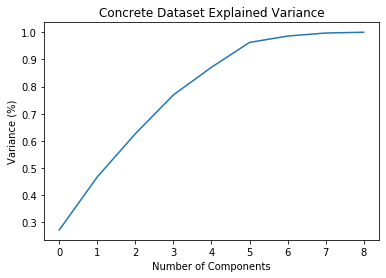

In [15]:
from sklearn.decomposition import PCA

pca = PCA().fit(transform_df)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Concrete Dataset Explained Variance')
plt.show()



We will take n_component as 6, as the desired confidence appears to be achieved with  6 components with 96% of data retained.

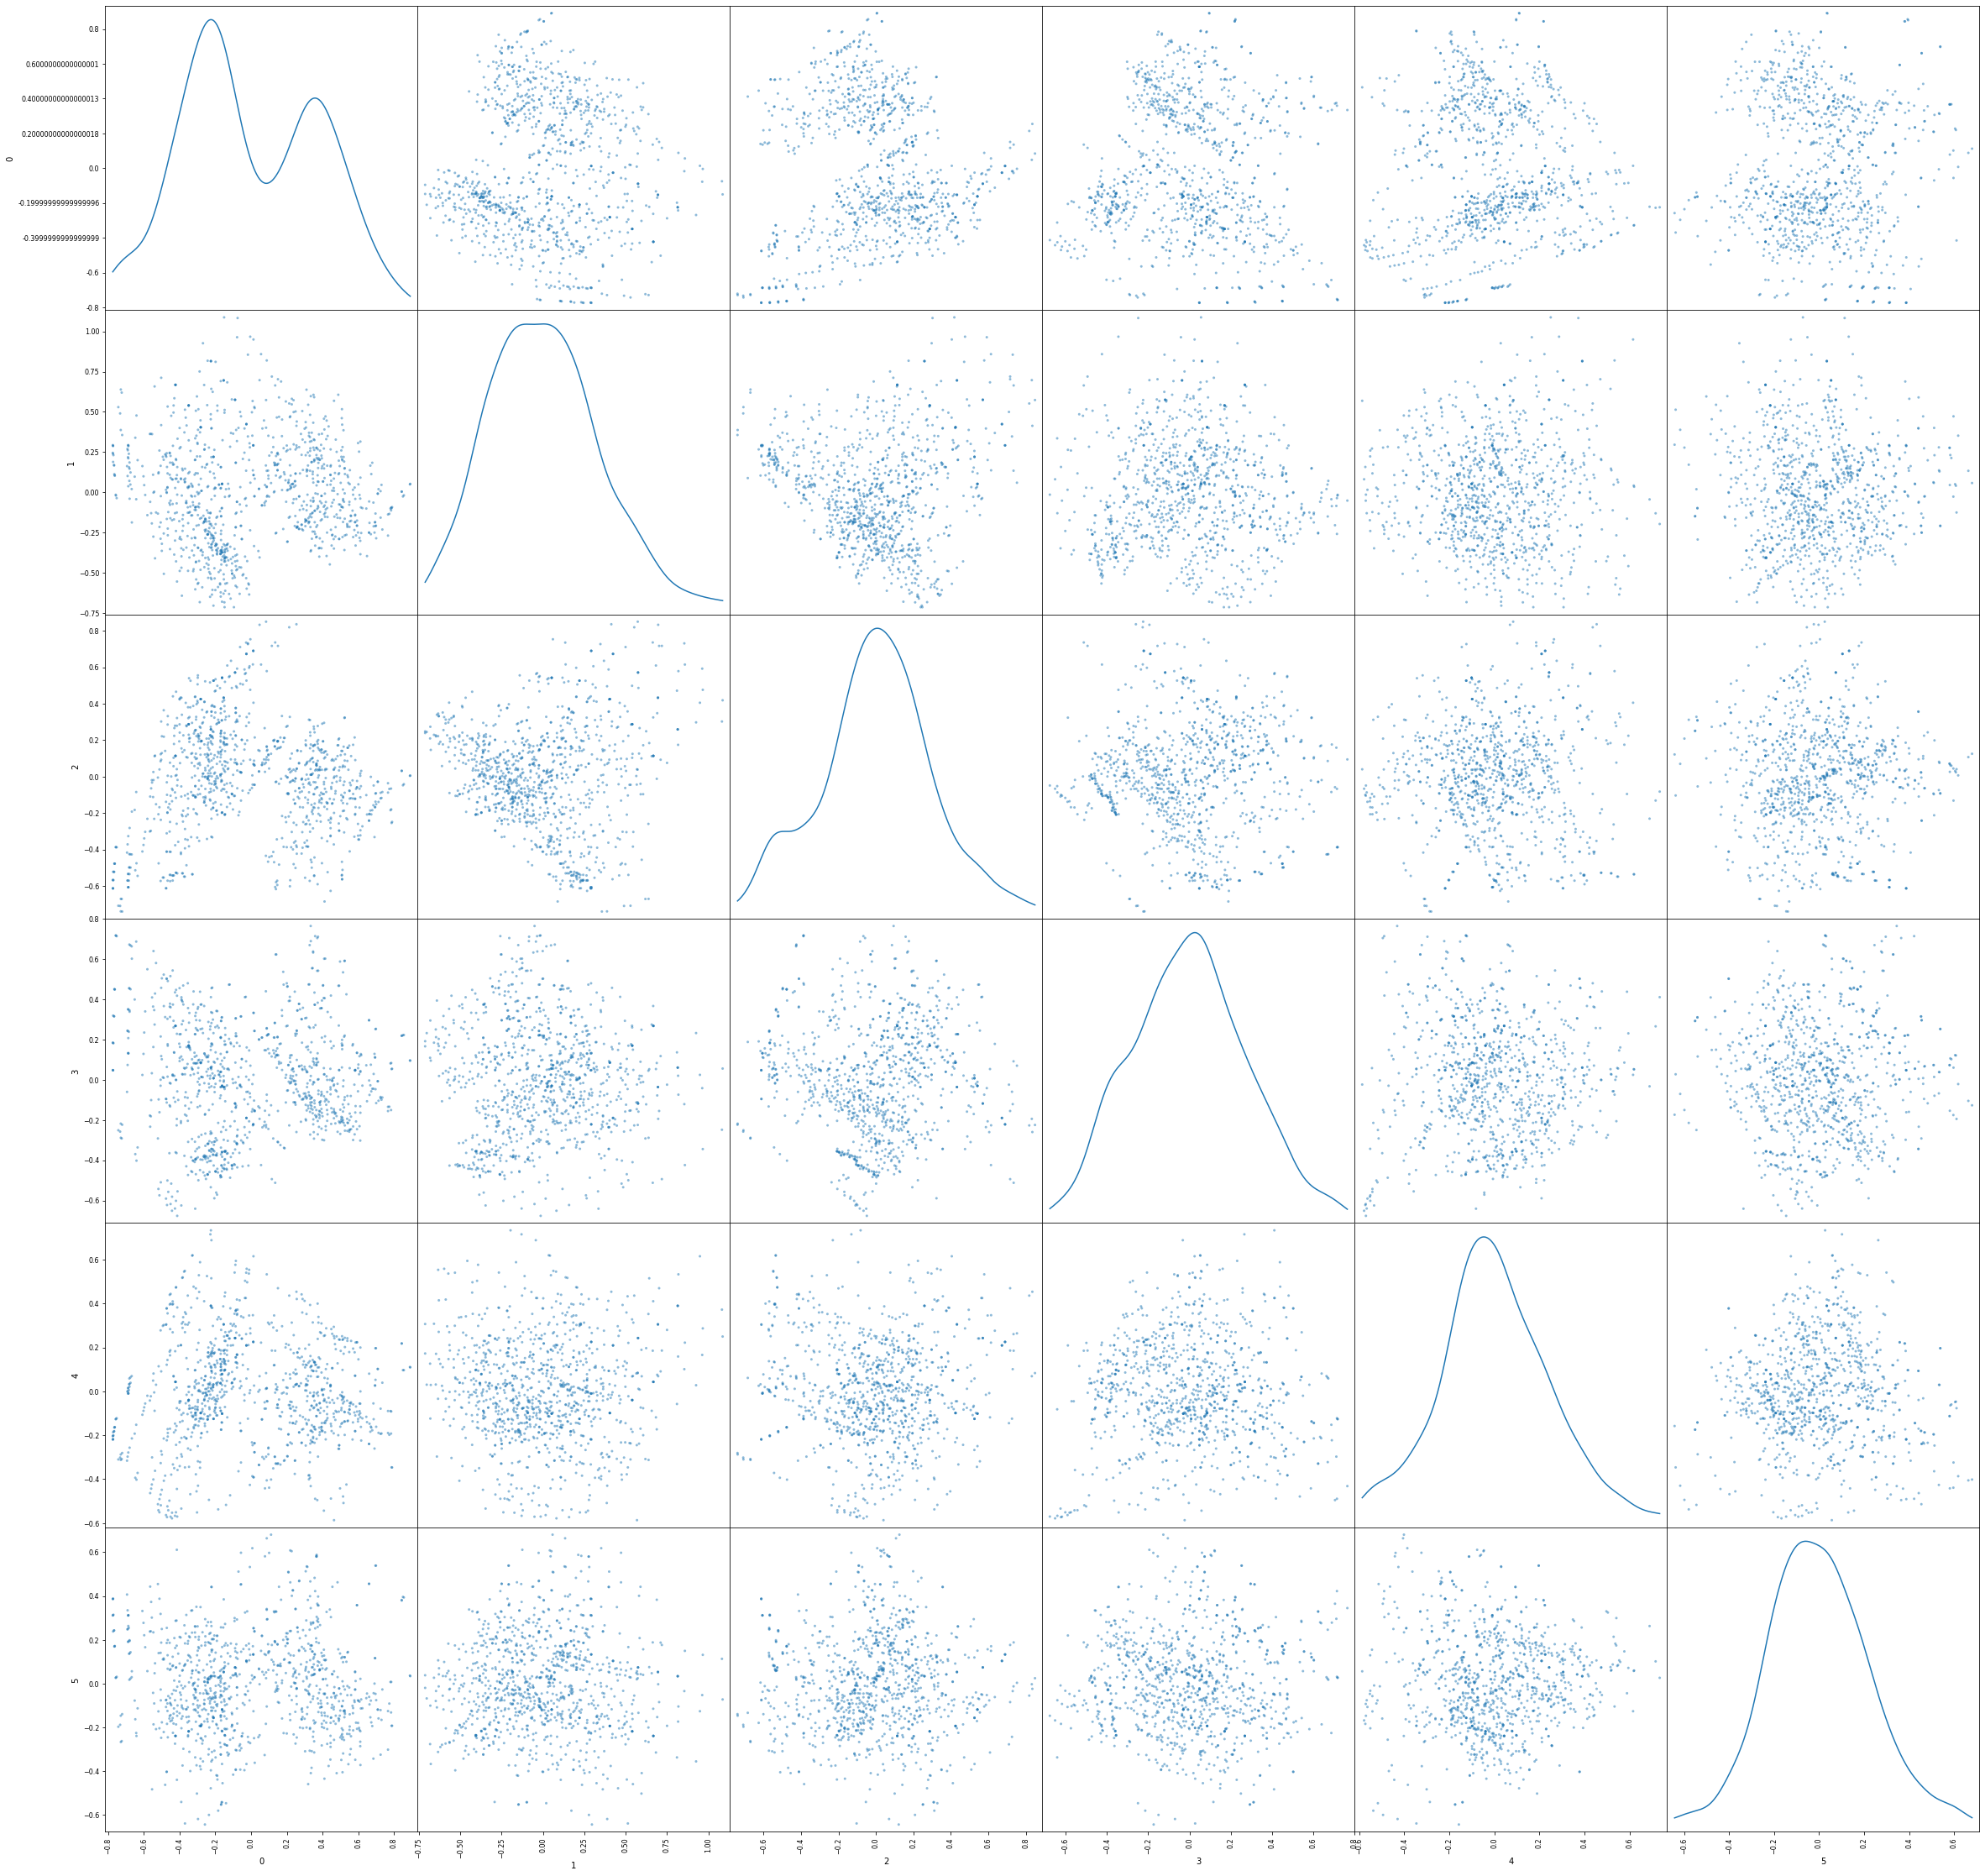

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from pandas.plotting import scatter_matrix

pca = PCA(n_components=6, svd_solver="randomized")
pca.fit(transform_df)
pca_concrete_df = pca.transform(transform_df)

spd = scatter_matrix(pd.DataFrame(pca_concrete_df), figsize = (40,40), diagonal='kde')


In [17]:
X_new = np.array(pca_concrete_df)
X_train, X_test,y_train,y_test = train_test_split(X_new,y, test_size = 0.30, random_state=5)

svr = SVR(gamma='auto')
print("\n====================================================================\n")
svr.fit(X_new,y)
test_prediction = svr.predict(X_test)
test_score = svr.score(X_test, y_test)
train_score = svr.score(X_train, y_train)
print("**SVR** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))


param_grid = {'C':[0.01,0.05,0.5,1], 'gamma': ['scale'], 'kernel':['linear','rbf']}
regCV = GridSearchCV(SVR(),param_grid,refit = True, cv=10)
print("\n====================================================================\n")
regCV.fit(X_new,y)
test_prediction = regCV.predict(X_test)
test_score = regCV.score(X_test, y_test)
train_score = regCV.score(X_train, y_train)
print("**GridSearchCV** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))


for model in regArr:
    test_score, train_score = predictModelAccuracy(model,X_new,y)
    print("**%s** Test Data Score:  %.4f Training Data Score: %.4f" %(model.__class__.__name__, test_score, train_score))

print("\n====================================================================\n")
voteReg.fit(X_new,y)
X_train, X_test,y_train,y_test = train_test_split(X_new,y, test_size = 0.30, random_state=1)
test_prediction = voteReg.predict(X_test)
test_score = voteReg.score(X_test, y_test)
train_score = voteReg.score(X_train, y_train)
print("**VotingRegressor** Test Data Score:  %.4f Training Data Score: %.4f" %(test_score, train_score))
print("\n====================================================================\n")
    



**SVR** Test Data Score:  0.9226 Training Data Score: 0.9313


**GridSearchCV** Test Data Score:  0.9269 Training Data Score: 0.9391
**GradientBoostingRegressor** Test Data Score:  0.9397 Training Data Score: 0.9434
**BaggingRegressor** Test Data Score:  0.9924 Training Data Score: 0.9920
**RandomForestRegressor** Test Data Score:  0.9912 Training Data Score: 0.9920
**DecisionTreeRegressor** Test Data Score:  0.9924 Training Data Score: 0.9926
**LinearRegression** Test Data Score:  0.8789 Training Data Score: 0.8826
**GaussianProcessRegressor** Test Data Score:  1.0000 Training Data Score: 1.0000


**VotingRegressor** Test Data Score:  0.9849 Training Data Score: 0.9853




### Conclusion
From all the observation made above, using VotingRegressor on the dataset without feature selection gives the accuracy of about 97% on test and training data. VotingRegressor on SelectKBest with 5 features has an accuracy of about 95%. SelectFromModel chooses 4 features viz.,cement, slag, water and age which seem to give about 95% accuracy as well. 

After PCA with 6 components, using VotingRegressor with GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, DecisionTreeRegressor, LinearRegression, GaussianProcessRegressor models, gives accuracy of 98% on test and training data. In my recommendation, this model is fine-tuned to give great performance in producion.